<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-BlackPuma075/blob/main/Sep_8_9/LRSKLearn_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
#Load data
houses=np.loadtxt("/content/drive/MyDrive/Machine_Learning/houses.txt",delimiter=',')
Xh=houses[:,:4]
th=houses[:,4] #Costo de la Casa"
labels=["Tamaño","# habitaciones","pisos","Años"]

In [4]:
Xh.shape

(100, 4)

In [5]:
scaler = StandardScaler()
Xh_norm = scaler.fit_transform(Xh)

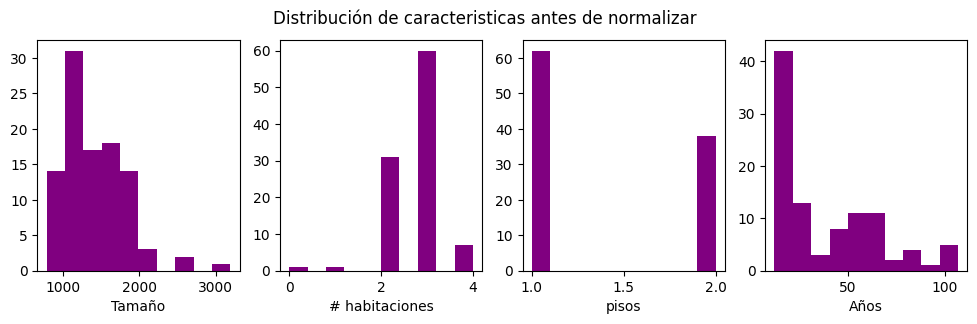

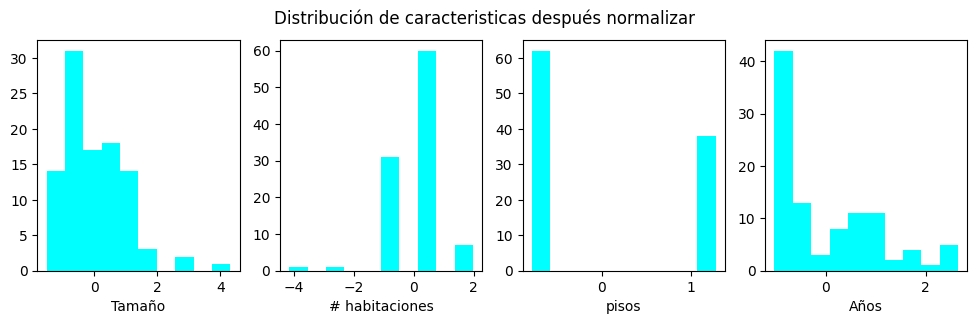

In [28]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(Xh[:,i], color = 'purple')
    ax[i].set_xlabel(labels[i])
fig.suptitle("Distribución de caracteristicas antes de normalizar ")
plt.show()

fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(Xh_norm[:,i], color = 'cyan')
    ax[i].set_xlabel(labels[i])
fig.suptitle("Distribución de caracteristicas después normalizar ")
plt.show()

In [7]:
sgdr = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
sgdr.fit(Xh_norm, th)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(learning_rate='constant')
number of iterations completed: 17, number of weight updates: 1701.0


In [8]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

model parameters:                   w: [361.55007133], b:[110.06068102 -22.36066649 -33.24822703 -36.91076814]


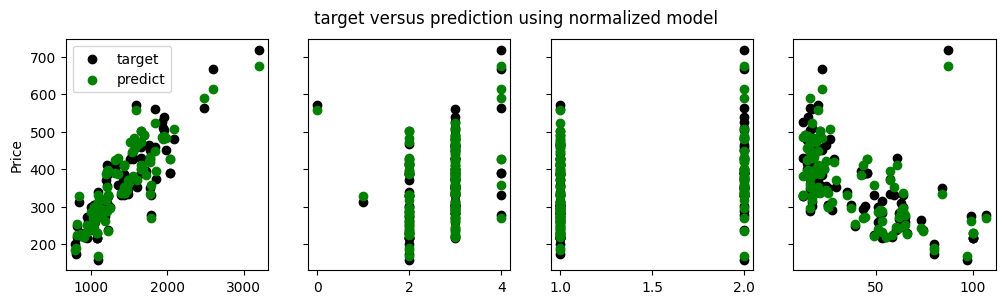

In [30]:
#predict target using normalized features
yp = w0_norm[0]
for i in range(len(w_norm)):
  yp+=w_norm[i]*Xh_norm[:,i]

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(Xh[:,i],th, label = 'target', color = 'black')
    ax[i].scatter(Xh[:,i],yp,color="green", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using normalized model")
plt.show()

In [10]:
#USING LIBRARIES
#Split in Train and Test samples.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(Xh_norm, th, test_size=0.30, random_state=42)

In [12]:
#Solve using Scikit learn

sgdr = SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.01,penalty=None)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)
number of iterations completed: 24, number of weight updates: 1681.0


In [13]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

model parameters:                   w: [361.10782889], b:[109.86481742 -22.45926508 -34.95923467 -38.40699868]


In [14]:
#Test score
sgdr.score(X_test,y_test)

0.9617895037181691

In [15]:
#Usando KERAS
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

np.random.seed(2)
model = Sequential()

In [16]:
input_dim = 4
output_dim = 1
model.add(Dense(output_dim, input_dim=input_dim, activation='linear'))
sgd = SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=sgd)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
num_epochs = 100
batch_size =X_train.shape[0] #30
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 0s 455ms/step - loss: 140206.8594
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 134628.8125
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 129279.0312
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 124147.9297
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 119226.3750
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 114505.5859
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 109977.1953
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 105633.1875
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 101465.8750
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 97467.9297
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 93632.3125
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: 89952.

In [18]:
capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)

[[ 58.774963 ]
 [  0.8053615]
 [-15.103471 ]
 [-50.151154 ]] [312.5092]


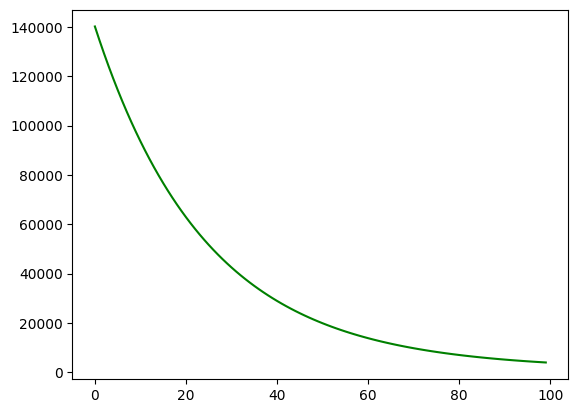

In [24]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot(color = 'green');

In [20]:
history2= model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 0s 15ms/step - loss: 3816.9387
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 3713.7598
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 3614.3286
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 3518.5017
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 3426.1365
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 3337.0986
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 3251.2581
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 3168.4929
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 3088.6816
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 3011.7114
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 2937.4722
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 2865.8594
Epoch 13/100
1/1 [===

In [21]:
capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)

[[ 82.19927 ]
 [ -9.431928]
 [-23.767448]
 [-47.50453 ]] [354.06604]


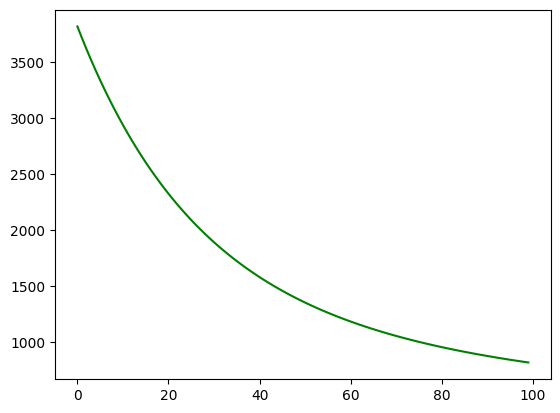

In [26]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history2.history)
# use Pandas native plot method
history_df['loss'].plot(color = 'green');

In [23]:
score = model.evaluate(X_test, y_test, verbose=0)
score

1190.305419921875